In [7]:
import numpy as np
import pandas as pd
import os
from pathlib import Path
from fedot_ind.api.utils.path_lib import PROJECT_PATH

In [13]:
path_to_datasets = PROJECT_PATH + '/benchmark/results/ts_regression'
path_to_results_2024 = PROJECT_PATH + '/benchmark/results/time_series_multi_reg_comparasion_09022024.csv'
path_to_server_results_2024 = PROJECT_PATH+'/benchmark/results/server_results/ts_regression'
reg_comp =pd.read_csv(path_to_results_2024, sep=';',decimal='.', index_col=0)
empty_result = 10000000000
reg_comp = reg_comp.replace(0,empty_result)

In [14]:
for i in os.listdir(path_to_datasets):
    try:
        metric_report = Path(path_to_datasets, i, 'metrics_report.csv')
        data = pd.read_csv(metric_report, index_col=0)
        new_metric = float(data.loc[i, ['Fedot_Industrial']].values)
        if i in os.listdir(path_to_server_results_2024):
            metric_report_server = Path(path_to_server_results_2024, i, 'metrics_report.csv')
            data_server = pd.read_csv(metric_report_server, index_col=0)
            new_metric_server = float(data_server.loc[i, ['Fedot_Industrial']].values)
        else:
            new_metric_server = empty_result
        old_metric = float(reg_comp.loc[i, ['Fedot_Industrial_best']].values)
        best_metric =  min(old_metric,new_metric_server,new_metric)
        print(f'-----------------------------------------------------\n'
              f'Result for dataset - {i}\n'
              f'old_metric - {old_metric}\n'
              f'new metric - {new_metric}\n'
              f'server metric - {new_metric_server}\n'
              f'best_metric - {best_metric}\n'
              f'-----------------------------------------------------\n')
        reg_comp.loc[i, ['Fedot_Industrial_best']] = best_metric
    except Exception as e:
        print(f"{e}")
        print(f"{i}")

-----------------------------------------------------
Result for dataset - AppliancesEnergy
old_metric - 1.924
new metric - 2.2104584201882065
server metric - 10000000000
best_metric - 1.924
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - BeijingPM10Quality
old_metric - 96.752
new metric - 102.34971137937343
server metric - 10000000000
best_metric - 96.752
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - BeijingPM25Quality
old_metric - 60.75
new metric - 68.59642702219254
server metric - 10000000000
best_metric - 60.75
-----------------------------------------------------

-----------------------------------------------------
Result for dataset - BenzeneConcentration
old_metric - 1.637
new metric - 7.908875114519044
server metric - 10000000000
best_metric - 1.637
-----------------------------------------------------

--------

In [15]:
reg_comp = reg_comp[reg_comp['Fedot_Industrial_best']!=empty_result]

## Most unrobust models

In [16]:
model_df = reg_comp
not_stable_models = list(model_df.mean().sort_values(ascending=False)[:5].index)
not_stable_models

['RDST_RMSE', 'RIST_RMSE', 'Ridge_RMSE', 'CNN_RMSE', 'TSF_RMSE']

In [17]:
def categorize_dataset(metric):
    if metric < 10:
        return 'Easy to solve dataset'
    elif 10 < metric < 20:
        return 'Normal to solve dataset'
    elif 20 < metric < 30:
        return 'Hard to solve dataset'
    else:
        return 'Extraordinary Hard to solve dataset'

In [18]:
stable_models = [ x for x in reg_comp.columns if x not in not_stable_models]
reg_comp['Difference %'] = ((reg_comp.iloc[:, :-2].min(axis=1) - reg_comp['Fedot_Industrial_best']) / min(reg_comp.iloc[:, :-2].min(axis=1).values[0],reg_comp.iloc[:, :-2].mean(axis=1).values[0])) * 100
reg_comp['Metric dispersion by dataset'] = (reg_comp.iloc[:, :-1].std(axis=1)/reg_comp.iloc[:, :-1].max(axis=1))*100
reg_comp['dataset_category'] = reg_comp['Metric dispersion by dataset'].apply(categorize_dataset)
reg_comp = reg_comp[reg_comp['Fedot_Industrial_best']!=0]

In [19]:
reg_comp

,1NN-DTW_RMSE,1NN-ED_RMSE,5NN-DTW_RMSE,5NN-ED_RMSE,CNN_RMSE,DrCIF_RMSE,FCN_RMSE,FPCR-Bs_RMSE,FPCR_RMSE,FreshPRINCE_RMSE,...,ResNet_RMSE,Ridge_RMSE,RotF_RMSE,SingleInception_RMSE,TSF_RMSE,XGBoost_RMSE,Fedot_Industrial_best,Difference %,Metric dispersion by dataset,dataset_category
HouseholdPowerConsumption1,417.520861,534.266678,363.106601,507.796826,6.045497e+02,1.657667e+02,353.211342,110.606270,107.061828,1.040404e+02,...,108.828881,2.035437e+02,1.992346e+02,116.202251,2.761883e+02,227.507324,99.972746,3.909708,27.619601,Hard to solve dataset
AppliancesEnergy,5.739470,5.768104,4.504958,4.470334,4.097874e+00,2.404670e+00,4.452677,4.500813,4.419099,2.053976e+00,...,3.957921,4.695629e+00,2.557591e+00,4.399413,3.752866e+00,4.045985,1.924000,0.124929,18.433573,Normal to solve dataset
HouseholdPowerConsumption2,53.429559,76.024116,43.287550,57.685928,5.152938e+01,3.063533e+01,172.601053,41.344814,40.829072,2.939287e+01,...,33.304921,5.771092e+01,3.759094e+01,34.585894,3.601573e+01,38.955683,34.370000,-5.896093,17.004424,Normal to solve dataset
IEEEPPG,23.987240,27.769715,20.452884,23.655007,2.242689e+01,1.247458e+01,7.190419,26.398372,26.395514,1.011591e+01,...,5.051279,4.750275e+01,2.021281e+01,4.119866,2.047200e+01,21.033698,29.105472,-24.420600,22.156923,Hard to solve dataset
FloodModeling1,0.013817,0.018511,0.013124,0.019009,1.723553e-02,9.462636e-03,0.009510,0.020827,0.021319,8.750739e-03,...,0.009046,2.095060e-02,1.798786e-02,0.010004,1.102917e-02,0.019334,0.004626,0.001733,18.458389,Normal to solve dataset
BeijingPM25Quality,71.066726,73.245699,59.503839,60.872956,9.988757e+01,4.712755e+01,45.523481,61.336023,62.028248,4.341873e+01,...,44.166483,6.091479e+01,4.283921e+01,42.008177,6.167426e+01,42.147228,60.750000,-19.597525,15.859396,Normal to solve dataset
BenzeneConcentration,4.402315,4.858189,5.053820,4.240799,7.543093e+00,3.666043e+00,0.596533,4.884306,5.241220,2.132254e+00,...,0.302587,1.132592e+00,7.287375e-01,0.276406,4.189510e+00,0.218806,1.637000,-1.353166,30.551632,Extraordinary Hard to solve dataset
FloodModeling3,0.013074,0.017028,0.011562,0.017738,1.096383e-02,6.438931e-03,0.009331,0.018776,0.019448,5.582533e-03,...,0.007282,1.903150e-02,1.568419e-02,0.010451,8.546052e-03,0.017007,0.006690,-0.001495,19.130581,Normal to solve dataset
BeijingPM10Quality,118.230571,119.246110,95.318785,97.130645,1.275990e+02,7.057271e+01,70.596483,92.628381,93.047781,6.650945e+01,...,68.418040,9.235021e+01,6.631563e+01,66.519288,8.465717e+01,66.474818,96.752000,-31.625915,15.598830,Normal to solve dataset
FloodModeling2,0.011092,0.012949,0.012064,0.013299,1.852107e-02,5.180100e-03,0.004745,0.014591,0.013853,5.027746e-03,...,0.007550,1.416184e-02,7.900159e-03,0.007653,5.379332e-03,0.012971,0.006991,-0.002827,18.713455,Normal to solve dataset


# Compute ranks

In [20]:
clear_csv = reg_comp.iloc[:, :-3]
pd.DataFrame(clear_csv.rank(axis=1).mean(axis=0).sort_values(), columns=['mean rank'])

,mean rank
FreshPRINCE_RMSE,6.014286
DrCIF_RMSE,6.785714
Fedot_Industrial_best,8.114286
InceptionT_RMSE,8.957143
RotF_RMSE,9.414286
RIST_RMSE,9.785714
TSF_RMSE,9.928571
RandF_RMSE,10.285714
MultiROCKET_RMSE,10.557143
ResNet_RMSE,11.171429


Fedot.ind has mean rank 8.11. It's the 3'th place comparing with SOTA

In [21]:
groupby_df = reg_comp.groupby(by = 'dataset_category').mean()
groupby_df = groupby_df.iloc[:,:-2]
groupby_df['Difference in each category %'] = groupby_df.iloc[:, :-1].min(axis=1) - groupby_df['Fedot_Industrial_best']
groupby_df['Difference in each category %']

dataset_category
Easy to solve dataset                  -0.020968
Extraordinary Hard to solve dataset     2.558543
Hard to solve dataset                  -2.780147
Normal to solve dataset                54.236567
Name: Difference in each category %, dtype: float64

# Top-k stats

In [22]:
top_1 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(1)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-1']).fillna(0)
top_3 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(3)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-3'])
top_5 = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(5)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-5'])
top_half = pd.DataFrame(clear_csv.T.apply(lambda x: x.nsmallest(7)).notnull().sum(axis=1).sort_values(ascending=False), columns = ['top-half'])
pd.concat([top_1, top_3, top_5, top_half], axis=1).fillna(0)

,top-1,top-3,top-5,top-half
Fedot_Industrial_best,10.0,15.0,15.0,17
InceptionT_RMSE,5.0,12.0,15.0,20
DrCIF_RMSE,4.0,7.0,16.0,21
MultiROCKET_RMSE,4.0,6.0,8.0,13
FPCR_RMSE,2.0,5.0,7.0,8
RDST_RMSE,2.0,6.0,7.0,7
RIST_RMSE,2.0,9.0,13.0,18
ResNet_RMSE,2.0,4.0,9.0,14
FCN_RMSE,1.0,3.0,5.0,10
FreshPRINCE_RMSE,1.0,11.0,19.0,27


# Rank Distribution

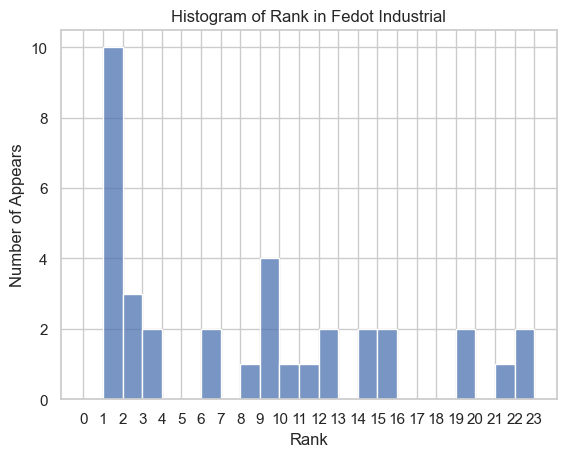

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1) 
bins = np.arange(clear_csv.shape[1])
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with seaborn
sns.histplot(quantiles.loc[:, 'Fedot_Industrial_best'], bins=bins)

# Add labels and title
plt.xlabel('Rank')
plt.ylabel('Number of Appears')
plt.xticks(bins)
plt.title('Histogram of Rank in Fedot Industrial')

# Show the plot
plt.show()

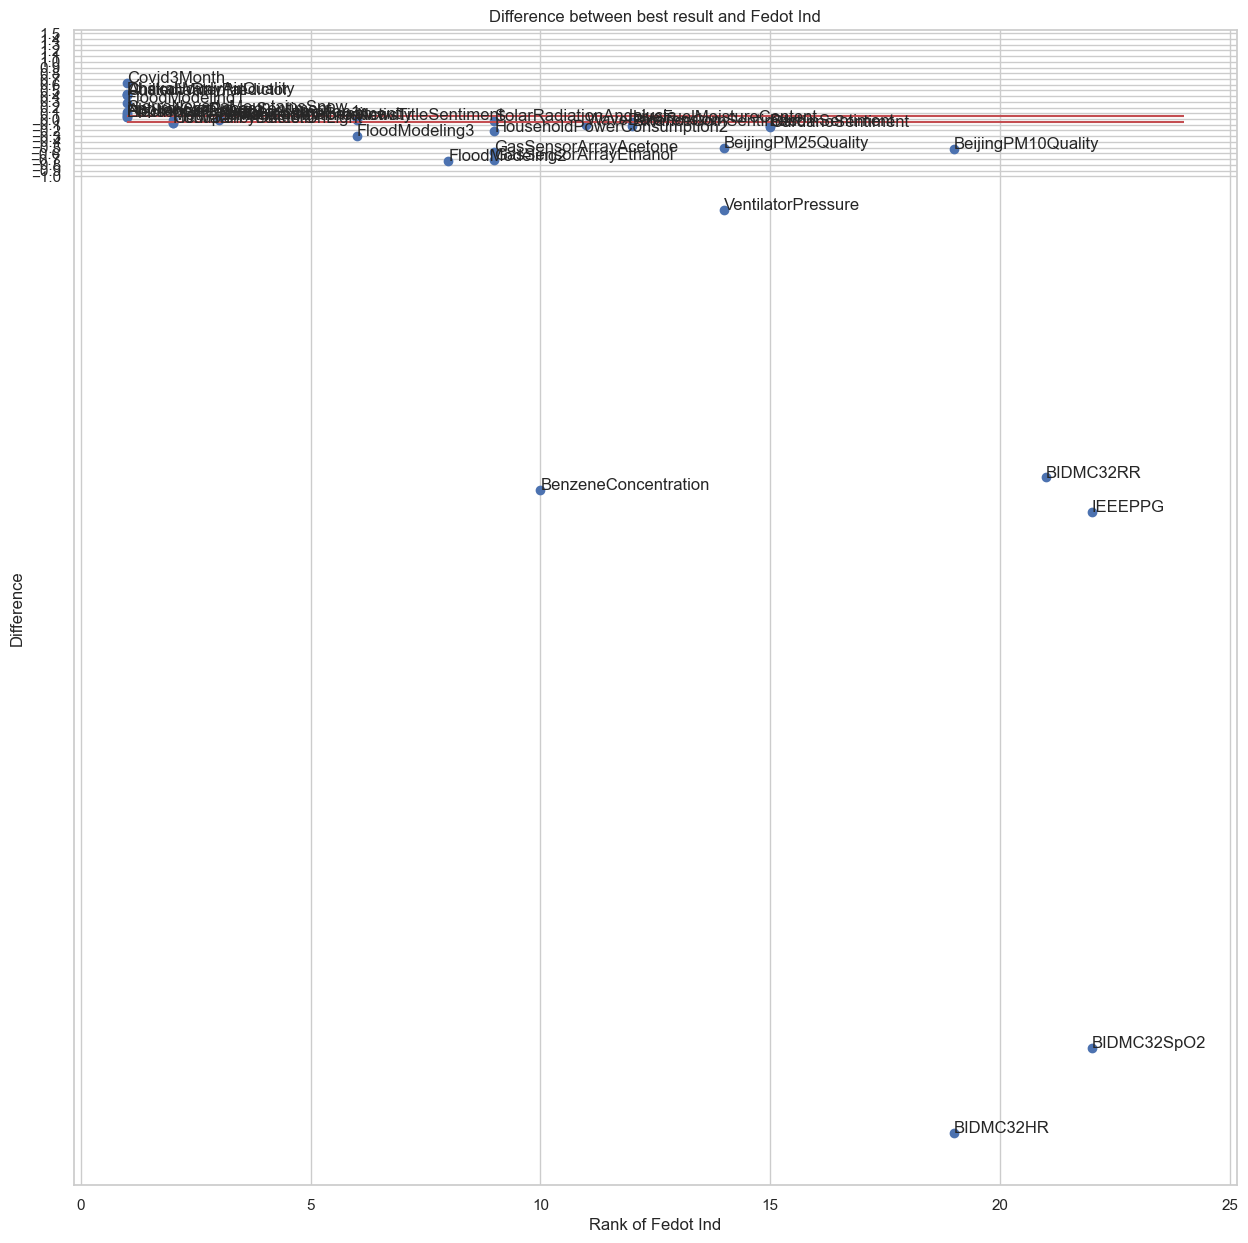

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
# Assuming clear_csv is a pandas DataFrame and 'Fedot_Industrial' is a column in it
quantiles = clear_csv.rank(axis=1, ascending=True) 
differences_from_first_place = (clear_csv.iloc[:, :-1].min(axis=1) - clear_csv['Fedot_Industrial_best']) / clear_csv.iloc[:, :-1].min(axis=1)
# Set the style of the plot
sns.set(style="whitegrid")
plt.yticks(np.arange(-1, 4, 0.1))

# Create a histogram with seaborn
plt.scatter(quantiles.loc[:, 'Fedot_Industrial_best'], differences_from_first_place)
for i in range(len(quantiles.loc[:, 'Fedot_Industrial_best'])):
    plt.annotate(reg_comp.index.values[i], (quantiles.loc[:, 'Fedot_Industrial_best'].values[i], differences_from_first_place.values[i]))

plt.hlines(y = 0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
plt.hlines(y = -0.05, xmin = 1, xmax = clear_csv.shape[1], color='r') 
# Add labels and title
plt.xlabel('Rank of Fedot Ind')
plt.ylabel('Difference')
plt.title('Difference between best result and Fedot Ind')

# Show the plot
plt.show()

# Poor solutions

In [26]:
poor_idx = reg_comp.sort_values(by='Difference %', ascending=True).iloc[:5, :].index.values
poor_idx

array(['HotwaterPredictor', 'BeijingPM10Quality', 'IEEEPPG',
       'BeijingPM25Quality', 'BIDMC32HR'], dtype=object)

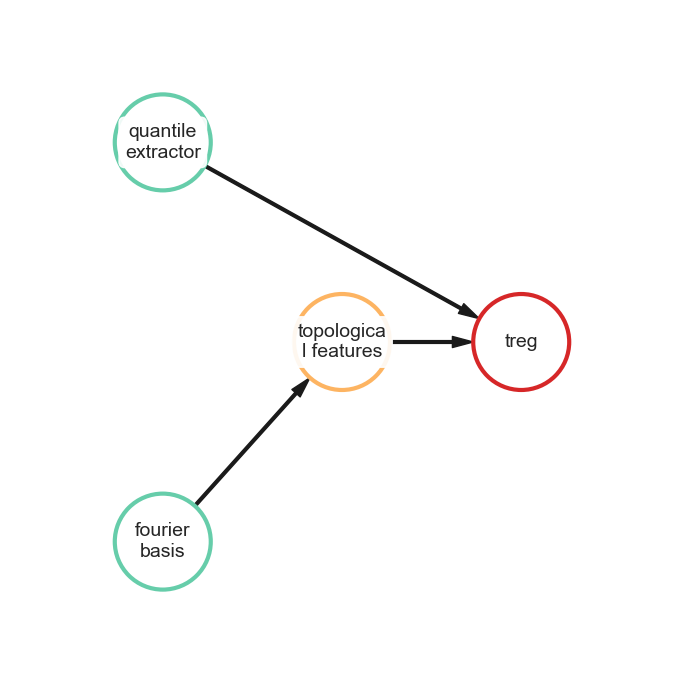

For BeijingPM10Quality no results!
For IEEEPPG no results!
For BeijingPM25Quality no results!
For BIDMC32HR no results!


In [27]:
import os
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
prefix = 'pipeline_saved'
for idx in poor_idx:
    try:
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        pipeline.show()
    except:
        print(f'For {idx} no results!')

There are no fittnes_by_generation file that may mean not enough time for composing

# Good solutions

In [28]:
good_idx = reg_comp.sort_values(by='Difference %', ascending=True).iloc[:5, :].index.values
from pathlib import Path
from fedot.core.pipelines.pipeline import Pipeline
for idx in good_idx[1::]:
    try:
        print(idx)
        best_model = Path(path_to_datasets, idx)
        saved_pipeline = [x for x in os.listdir(best_model) if x.__contains__(prefix)][0]
        best_model = Path(path_to_datasets, idx,  saved_pipeline, f'{saved_pipeline}.json')
        pipeline = Pipeline().load(best_model)
        for i in pipeline.nodes:
            if i.name == 'fedot_regr':
                subpipeline = i.fitted_operation.model.current_pipeline
                print(subpipeline)
        pipeline.show()
    except Exception as e:
        print(e)
        print(f'For {idx} no results!')

BeijingPM10Quality
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For BeijingPM10Quality no results!
IEEEPPG
[Errno 2] No such file or directory: 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\benchmark\\results\\ts_regression\\IEEEPPG\\0_pipeline_saved\\0_pipeline_saved.json'
For IEEEPPG no results!
BeijingPM25Quality
No module named 'fedot_ind.core.operation.interfaces.industrial_decomposition_for_forecasting_strategy'
For BeijingPM25Quality no results!
BIDMC32HR
[WinError 3] Системе не удается найти указанный путь: 'D:\\WORK\\Repo\\Industiral\\IndustrialTS\\benchmark\\results\\ts_regression\\BIDMC32HR'
For BIDMC32HR no results!
